<h2> Hand written digit recognition <h2\>

In [ ]:
""" Import the librairies"""

try :
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import pandas as pd
except ImportError : 
    print("ImportError")

In [2]:
"""Import the data"""
try :
    df_train = pd.read_csv("/Users/pgpetitmangin/perso/number_detection/data/train.csv")
except ImportError:
    print("ImportError for the train dataset")

try :
    df_test = pd.read_csv("/Users/pgpetitmangin/perso/number_detection/data/test.csv")
except ImportError:
    print("ImportError for the test dataset")

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
label,42000.0,4.456643,2.887730,0.0,2.0,4.0,7.0,9.0
pixel0,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel1,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel779,42000.0,0.002857,0.414264,0.0,0.0,0.0,0.0,62.0
pixel780,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel781,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,42000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
count_nul = (df_train.max() < 1e-10).sum()

print("number of columns with only zeros",count_nul)

max_values = df_train.max()
col_nul = max_values[max_values < 1e-10].index.tolist()

print("name of the columns with only zeros",col_nul)

print("maximum possibility of a pixel",df_train.drop(columns = 'label').max().max())





number of columns with only zeros 76
name of the columns with only zeros ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141', 'pixel168', 'pixel196', 'pixel392', 'pixel420', 'pixel421', 'pixel448', 'pixel476', 'pixel532', 'pixel560', 'pixel644', 'pixel645', 'pixel671', 'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727', 'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel780', 'pixel781', 'pixel782', 'pixel783']
maximum possibility of a pixel 255


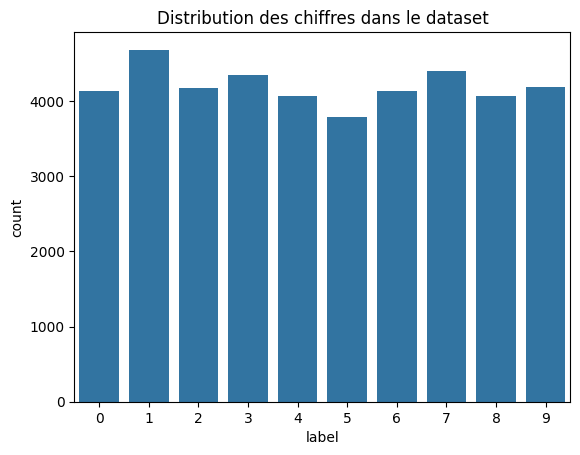

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que ton label est dans la colonne 'label'
sns.countplot(x='label', data=df_train)
plt.title("Distribution des chiffres dans le dataset")
plt.show()

[]

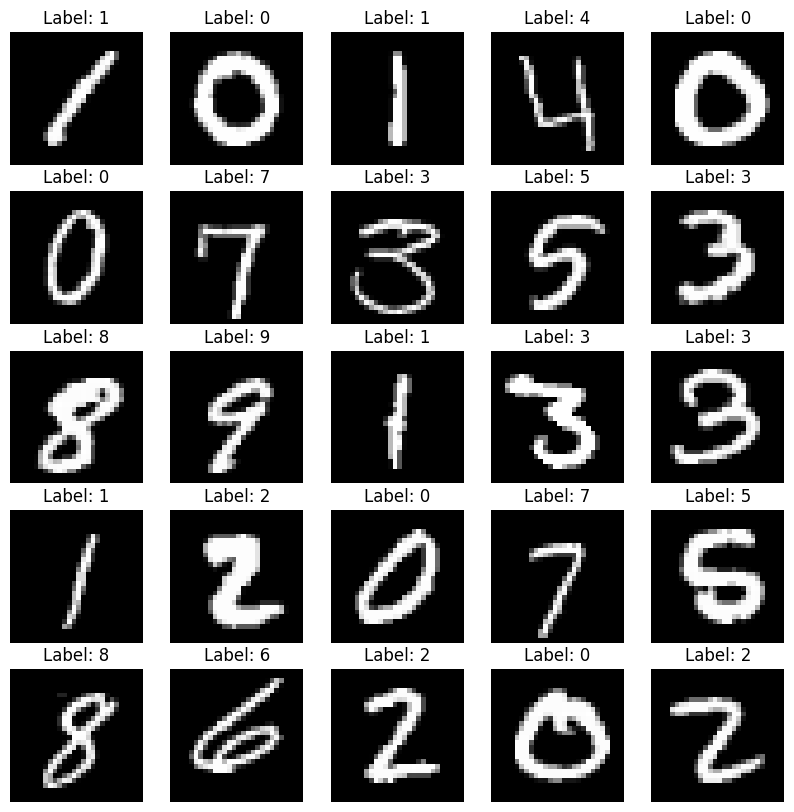

In [ ]:
"""Plot the top 25 numbers with their label"""

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes_flat = axes.ravel()
for i in range(25):
    df_to_see = df_train.iloc[i,1:].values
    df_r = np.reshape(df_to_see,(28,28))
    ax = axes_flat[i]
    label = df_train.iloc[i,0]
    ax.imshow(df_r,cmap = 'gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
    
plt.plot()
    



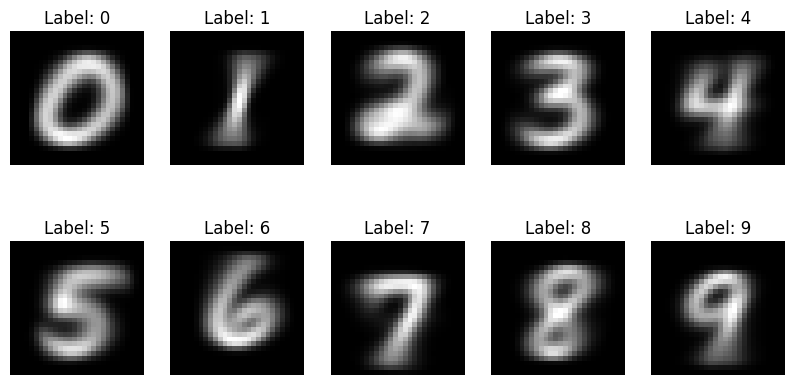

In [30]:
"""Plot the mean of every label"""
df_g_m = (df_train.groupby('label')).mean()
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes_flat = axes.ravel()
for i in range(10):
    df_to_see = df_g_m.iloc[i].values
    df_r = np.reshape(df_to_see,(28,28))
    ax = axes_flat[i]
    ax.imshow(df_r,cmap = 'gray')
    ax.set_title(f"Label: {i}")
    ax.axis('off')
